#                              Analysis of Conference Data
#### Submitted by: Akshit Goyal (1005095068)

<br> 


<b> Hypothesis: </b> Number of people attending the conference increase each year. 

To test this, we will be using Linear Regression. <br>
First we will set our Null Hypothesis first. <br>

<b>Null Hypothesis:</b> Population remains the same over the years. <br>
This implies that our coeffecient of x i.e. B(Beta Value) in a linear regression model(y = Bx + c) must be 0. 

Analysis: We will be using various python libraries for testing  this. 
                                           

### Import important libraries

In [1]:
import csv
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm

In [9]:
# Read population data from the CSV file.
data = pd.read_csv("population_data.csv")
data
# Year 0 corresponds to '2016' and similarly other index values map to consective years untill 2020 i.e. 5.

,Year,Population
0,1,330
1,2,400
2,3,470
3,4,445
4,5,446


In [3]:
data.describe()

,Year,Population
count,5.000000,5.000000
mean,3.000000,418.200000
std,1.581139,55.418408
min,1.000000,330.000000
25%,2.000000,400.000000
50%,3.000000,445.000000
75%,4.000000,446.000000
max,5.000000,470.000000


### Define the dependent(y) and the independent variable(x1)

In [4]:
y = data['Population']
x1 = data['Year']

### Explore the Data

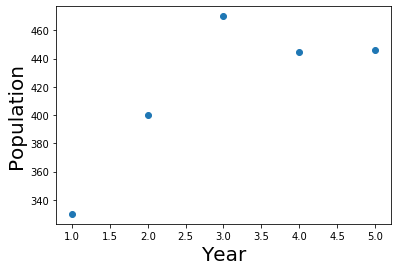

In [5]:
plt.scatter(x1,y) 
plt.xlabel('Year', fontsize = 20) 
plt.ylabel('Population', fontsize = 20)
plt.show()

Now we will plot a regression line on the above scatter plot.

### Regression

In [6]:
x = sm.add_constant(x1) 
results = sm.OLS(y,x).fit()
results.summary()

/home/akki/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     4.991
Date:                Thu, 16 Jul 2020   Prob (F-statistic):              0.112
Time:                        13:53:54   Log-Likelihood:                -24.162
No. Observations:                   5   AIC:                             52.32
Df Residuals:                       3   BIC:                             51.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        335.1000     41.122      8.149      0.004     204.231     465.969
Year          27.7000     12.399      2.234      0.112     -11.758      67.158
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.533
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.464
Skew:                           0.596   Prob(JB):                        0.793
Kurtosis:                       2.103   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  Plotting the Regression

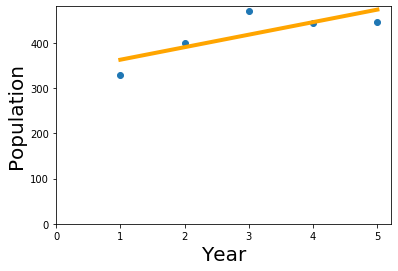

In [7]:
plt.scatter(x1,y) 
yhat = 27.7000*x1 + 335.1000 #These values are from Regression Table. 27.700 is Year coef and 335.1 is constant.
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line') 
plt.xlabel('Year', fontsize = 20) 
plt.ylabel('Population', fontsize = 20) 
plt.xlim(0)
plt.ylim(0)
plt.show()

We can see from the regression table and our graph that the B value(coeffecient of x) is non-zero. Therefore, our Null-Hypothesis is not true.  

This implies that the alternative hypothesis i.e. the population is changing each year. Since our B > 0, it must be increasing. 

Aditionally, to  verify our hypothesis we will perform t-test.

For this we will randomly generate sample population data within the same range (300-500) as our collected population data.

In [11]:
import random
random_pop_data = random.sample(range(300,500),5)

Now that we have both the values, we will perform a t-test using statsmodels library.

In [20]:
import statsmodels

original_pop_data = y.values # Population values used in  linear regression above.

t_statistics = statsmodels.stats.weightstats.ttest_ind(random_pop_data, original_pop_data)[0]
print(t_statistics)

-1.1164307015648762


When compared to a random sample of population, t test gives us a negative value. This implies that the means are different and our null hypothesis is incorrect as linear regression didn't support our hypothesis by chance.

There is another important factor to note here that due COVID-19, the conference in 2020 (data point 5) must be rescheduled or does not represent the actual population data which might decrease the participation. However, we still see an increasing trend overall.

<b> Therefore, by linear regression and t-test, our hypothesis is valid for these data points. However, due to limited  amount of data (5 years) and possible bias in 2020 data, we cannot make a strong conclusion about increase in number of people attending the conference. </b>




<br>

<b> Second Hypothesis: </b> 